In [1]:
# import modules
from pydap.client import open_url

In [3]:
# specify opendap dataset url to .nc or .ncml file that you want to plot
url = 'http://opendap-devel.ooi.rutgers.edu:8090/thredds/dodsC/eov-3/Coastal_Endurance/CE04OSPS/2A-CTDPFA107/streamed/CE04OSPS-SF01B-2A-CTDPFA107-ctdpf_sbe43_sample-streamed/CE04OSPS-SF01B-2A-CTDPFA107-streamed-ctdpf_sbe43_sample-20151220T000000-20151223T115959.nc';
dataset = open_url(url)

In [4]:
# print variables that are available in the netcdf file
print dataset.keys()

['query_parameter_provenance', 'computed_provenance', 'instrument_provenance', 'time', 'seawater_density', 'ext_volt0', 'port_timestamp', 'driver_timestamp', 'internal_timestamp', 'practical_salinity', 'preferred_timestamp', 'corrected_dissolved_oxygen', 'id', 'seawater_pressure_qc_results', 'practical_salinity_qc_results', 'seawater_density_qc_results', 'provenance', 'seawater_temperature_qc_results', 'seawater_conductivity_qc_results', 'seawater_density_qc_executed', 'temperature', 'conductivity', 'pressure', 'pressure_temp', 'seawater_temperature', 'seawater_pressure_qc_executed', 'seawater_pressure', 'seawater_conductivity', 'deployment', 'ingestion_timestamp', 'int_ctd_pressure', 'practical_salinity_qc_executed', 'seawater_temperature_qc_executed', 'seawater_conductivity_qc_executed', 'lat', 'lon', 'l0_provenance_information']


In [6]:
# use the following commands to learn more about specific variables in the dataset
dataset['seawater_temperature'].dimensions

('obs',)

In [7]:
dataset['seawater_temperature'].shape

(1206263,)

In [8]:
dataset['seawater_temperature'].type

pydap.model.Float32

In [9]:
dataset['seawater_temperature'].attributes

{'_FillValue': -9999999.0,
 'comment': 'Seawater temperature near the sensor. Units: degrees Celsius',
 'coordinates': 'time lat lon int_ctd_pressure',
 'data_product_identifier': 'TEMPWAT_L1',
 'long_name': 'Seawater Temperature',
 'standard_name': 'sea_water_temperature',
 'units': 'deg_C'}

In [10]:
# grab some data from a few different variables. The [:] will grab all available data in the file.
# You can also subset your data by specifying indices inside of the [].
time = dataset['time'][:]
pressure = dataset['seawater_pressure'][:]
temp = dataset['seawater_temperature'][:]
sal = dataset['practical_salinity'][:]

In [11]:
# convert the time variable to datetime
from datetime import datetime
dtime = time/(24*3600) + datetime(1900,1,1).toordinal()

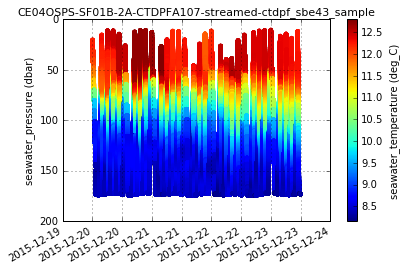

In [13]:
%matplotlib inline

# Let's make the plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Close any existing plots
plt.close('all')
 
# Setup the plot
fig, ax = plt.subplots()
 
# Turn on the plot grid
plt.grid() 
 
# Add the scatterplot with data
sc = plt.scatter(dtime,pressure, c=np.abs(temp), marker='o', edgecolor='none')
 
# Format the date axis
df = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(df)
fig.autofmt_xdate()
 
# Reverse the y-axis
ax.set_ylim(ax.get_ylim()[::-1])

# Plot labels
plt.ylabel(dataset['seawater_pressure'].name+" ("+ dataset['seawater_pressure'].units + ")")
plt.title(dataset.attributes['NC_GLOBAL']['source'], fontsize=11)
 
# Add the colorbar
clabel = dataset['seawater_temperature'].name +" ("+ dataset['seawater_temperature'].units + ")"
fig.colorbar(sc, ax=ax, label=clabel)

# Display the plot (this is a necessary step in Python) and save the figure to a file.
plt.show()
fig.savefig('pydap_fig1.png')

In [14]:
plt.close()